In [1]:
import numpy as np
import pandas as pd

In [2]:
df_property = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv')

In [3]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,--,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [4]:
df_property["ST_NUM"]

0    104.0
1    197.0
2      NaN
3    201.0
4    203.0
5    207.0
6      NaN
7    213.0
8    215.0
Name: ST_NUM, dtype: float64

In [5]:
df_property["NUM_BEDROOMS"].isna().sum()

2

In [6]:
missing_values = ["n/a", "na", "--"]
df_property = pd.read_csv(
    'https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/property_data.csv',
    na_values=missing_values
)

In [7]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [8]:
df_property["NUM_BEDROOMS"].isna().sum()

4

In [9]:
df_property["OWN_OCCUPIED"].isna()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
Name: OWN_OCCUPIED, dtype: bool

In [10]:
idx = 0
for value in df_property["OWN_OCCUPIED"]:
    print(value)
    try:
        int(value)
        df_property.loc[idx, "OWN_OCCUPIED"] = np.nan
    except ValueError:
        continue
    idx += 1

Y
N
N
12
Y
Y
nan
Y
Y


In [11]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,NaN,3.0,1,1000.0
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0


In [12]:
df_property.isna().sum()

PID             1
ST_NUM          2
ST_NAME         0
OWN_OCCUPIED    2
NUM_BEDROOMS    4
NUM_BATH        1
SQ_FT           2
dtype: int64

In [13]:
df_property.isna().values.any()

True

In [14]:
df_property.isna().sum().sum()

12

In [15]:
idx = 0
for value in df_property["NUM_BATH"]:
    print(value)
    try:
        float(value)
        df_property.loc[idx, "NEW_NUM_BATH"] = value
    except ValueError:
        df_property.loc[idx, "NEW_NUM_BATH"] = np.nan
        continue
    idx += 1

1
1.5
1
nan
2
1
HURLEY
1
2


In [16]:
df_property

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT,NEW_NUM_BATH
0,100001000.0,104.0,PUTNAM,NaN,3.0,1,1000.0,1
1,100002000.0,197.0,LEXINGTON,N,3.0,1.5,NaN,1.5
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850.0,1
3,100004000.0,201.0,BERKELEY,12,1.0,NaN,700.0,NaN
4,NaN,203.0,BERKELEY,Y,3.0,2,1600.0,2
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800.0,1
6,100007000.0,NaN,WASHINGTON,NaN,2.0,HURLEY,950.0,1
7,100008000.0,213.0,TREMONT,Y,NaN,1,NaN,2
8,100009000.0,215.0,TREMONT,Y,NaN,2,1800.0,NaN


In [17]:
mean_num_bedrooms = df_property.NUM_BEDROOMS.mean()
median_num_bedrooms = df_property.NUM_BEDROOMS.median()
df_property["NUM_BEDROOMS"].fillna(mean_num_bedrooms)

0    3.0
1    3.0
2    2.4
3    1.0
4    3.0
5    2.4
6    2.0
7    2.4
8    2.4
Name: NUM_BEDROOMS, dtype: float64

In [33]:
opsd_daily = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/opsd_germany_daily.csv',
                        index_col=0, parse_dates=True)

In [34]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [41]:
opsd_daily["Year"] = opsd_daily.index.year
opsd_daily["Month"] = opsd_daily.index.month
opsd_daily["Dayname"] = opsd_daily.index.day_name()
opsd_daily["Weekday"] = opsd_daily.index.weekday

In [43]:
opsd_daily

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Dayname,Weekday
Date,,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday,6
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday,0
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday,1
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday,2
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday,3
...,...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday,2
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday,3
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday,4


In [44]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Dayname,Weekday
Date,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,6
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,0
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,1
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,2
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,3


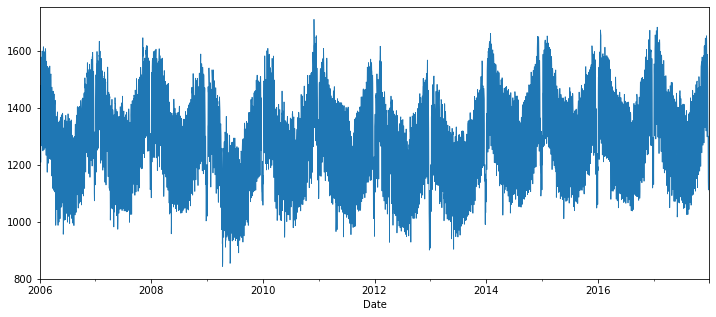

In [52]:
opsd_daily["Consumption"].plot(
    linewidth=.8,
    figsize=(12,5)
)

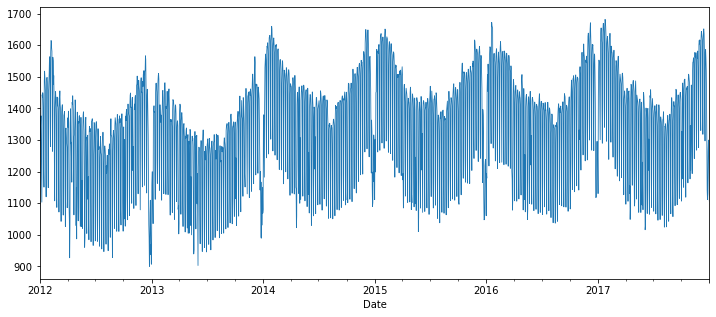

In [51]:
opsd_daily.loc["2012":"2017", "Consumption"].plot(
    linewidth=.8,
    figsize=(12,5)
)